# use the billboard data to practice data visualization

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import LinearSegmentedColormap
import plotly as py
import plotly.graph_objs as go

In [141]:
df = pd.read_csv('billboard.csv')
df.head(15)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,NaN,1,1
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,NaN,2,1
2,1958-08-04,3,Splish Splash,Bobby Darin,NaN,3,1
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,NaN,4,1
4,1958-08-04,5,When,Kalin Twins,NaN,5,1
5,1958-08-04,6,Rebel-'rouser,Duane Eddy His Twangy Guitar And The Rebels,NaN,6,1
6,1958-08-04,7,Yakety Yak,The Coasters,NaN,7,1
7,1958-08-04,8,My True Love,Jack Scott,NaN,8,1
8,1958-08-04,9,Willie And The Hand Jive,The Johnny Otis Show,NaN,9,1
9,1958-08-04,10,Fever,Peggy Lee,NaN,10,1


In [142]:
# Check for nulls
df.isna().sum()/len(df)

date              0.000000
rank              0.000000
song              0.000000
artist            0.000000
last-week         0.102214
peak-rank         0.000000
weeks-on-board    0.000000
dtype: float64

10% of last-week is missing, this is probably not a problem. we just leave it as is at this moment

In [143]:
df.describe()

,rank,last-week,peak-rank,weeks-on-board
count,326687.000000,293295.000000,326687.000000,326687.000000
mean,50.500938,47.594804,41.039582,9.136880
std,28.866095,28.053564,29.351217,7.566568
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,23.000000,14.000000,4.000000
50%,51.000000,47.000000,38.000000,7.000000
75%,76.000000,72.000000,66.000000,13.000000
max,100.000000,100.000000,100.000000,87.000000


In [144]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,year,month,month_year
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,NaN,1,1,1958,8,1958-08
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,NaN,2,1,1958,8,1958-08
2,1958-08-04,3,Splish Splash,Bobby Darin,NaN,3,1,1958,8,1958-08
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,NaN,4,1,1958,8,1958-08
4,1958-08-04,5,When,Kalin Twins,NaN,5,1,1958,8,1958-08


# Visualization
## Top 10 artists on Billboard

In [145]:
data = df['artist'].value_counts()[0:10]
data

Taylor Swift     1005
Elton John        889
Madonna           857
Kenny Chesney     758
Drake             735
Tim McGraw        731
Keith Urban       673
Stevie Wonder     659
Rod Stewart       657
Mariah Carey      621
Name: artist, dtype: int64

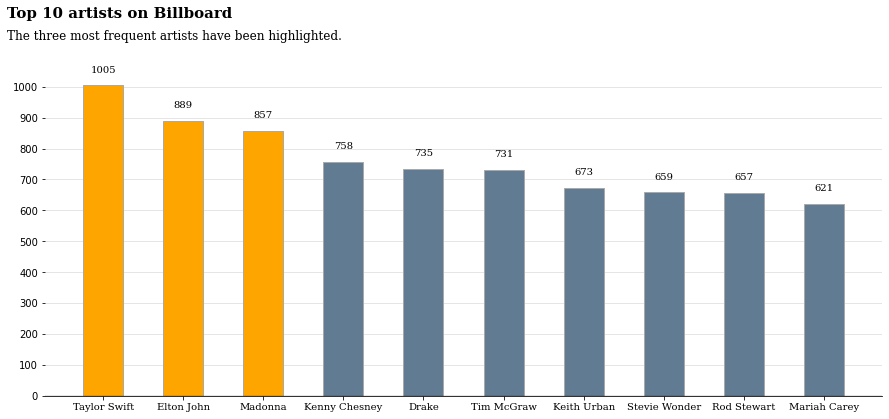

In [146]:
# Plot

color_map = ['#617B92' for _ in range(10)]
color_map[2] = color_map[1] =color_map[0]= '#FFA500' # color highlight

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=1,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 50), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 artists on Billboard', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent artists have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1100, 100) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)


plt.show()

In [159]:
number_of_songs[1:10]

,artist,song
1,Taylor Swift,113
2,Drake,98
3,The Beatles,65
4,Aretha Franklin,64
5,Elton John,58
6,The Rolling Stones,57
7,The Beach Boys,54
8,Stevie Wonder,54
9,Connie Francis,53


In [160]:
drop_dup_songs = df.drop_duplicates(['song','artist'],keep= 'last')
number_of_songs = drop_dup_songs.groupby('artist')[['song']].count().sort_values('song', ascending=False).reset_index()
productive_artist = number_of_songs[number_of_songs['song']>50]

In [168]:
import plotly
from plotly.subplots import make_subplots
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, subplot_titles=(""))
# Setting Bar parameters
fig.add_trace(go.Bar(x=productive_artist['artist'], 
                       y=productive_artist['song'],
                       name ='Count books',
                       marker_color=['#425464', '#4d6173', '#576e83','#617b92','#6e889f',
                                     '#7d94a9', '#8da1b3', '#a0afbd','#b0bdc8','#bfcad3',
                                    '#cfd7de', '#dfe4e9', '#eff1f4']),
                       row=1, col=1)

# Setting the parameters of the chart when displaying
fig.update_traces(marker_line_color='Gray',
                    marker_line_width=1)

# Setting the parameters of the chart when displaying
fig.update_layout(showlegend=False, 
                  title_text='Top artist by number of Songs(over 50 songs)',
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the graph
fig.show()

let's only look at the top 10 artist on billborad
- when do their song get most oftern on billboard
- how is their ratings

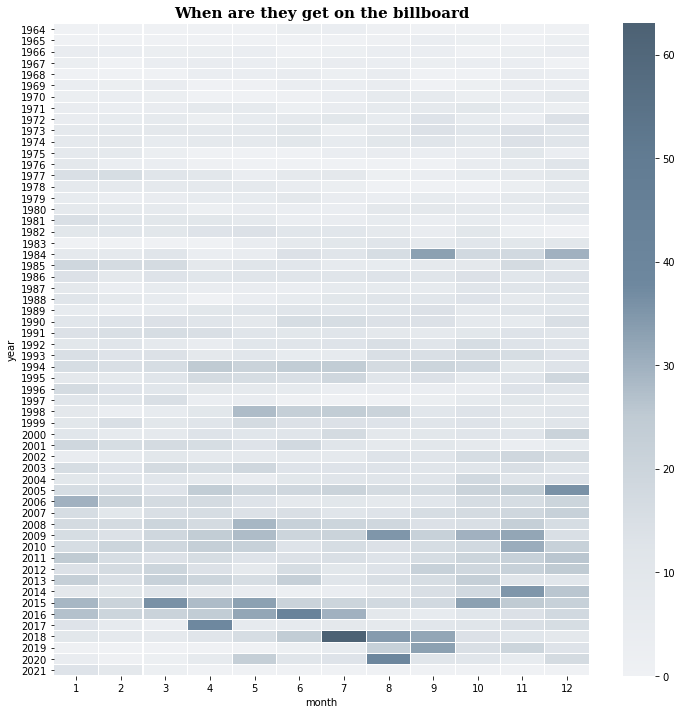

In [170]:
data = df['artist'].value_counts()[0:10]
df = df[df['artist'].isin(data.index.tolist())]
df

df5 = df.groupby('year')['month'].value_counts().unstack().fillna(0)

hc = ['#f5f5f1', '#e50914', '#b20710','#221f1f']
th = [0, 0.1, 0.5, 0.9, 1]

plt.figure(figsize=(12, 12))
sns.heatmap(df5,linewidths = 0.05, cmap=LinearSegmentedColormap.from_list('', ["#eff1f4","#dfe4e9","#bfcad3","#6e889f","#617b92","#4d6274"]))
plt.title('When are they get on the billboard',fontweight="bold",fontsize=15,fontfamily='serif')
plt.show()

the frequency is higher in recent years

<AxesSubplot:>

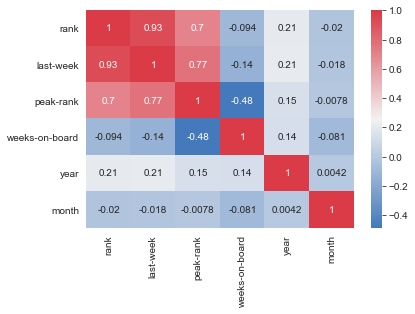

In [176]:
# plot the correlation heatmap
corr = df.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

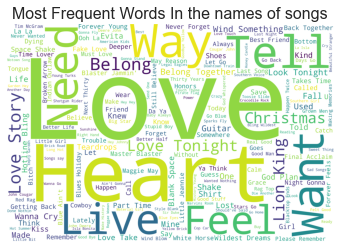

In [178]:
from wordcloud import STOPWORDS,WordCloud
plt.imshow(WordCloud(width=3000,height=2000,
                background_color ='white', stopwords=STOPWORDS).generate(' '.join(df.song.values)))
plt.axis('off')
plt.title('Most Frequent Words In the names of songs',fontsize=16)
plt.show()